# Correlation Analysis Between NIFTY Indices
This notebook analyzes the correlation between different NIFTY indices to understand their relationships and implications on portfolio diversification.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nifty_50_df = pd.read_csv('data/NIFTY 50.csv')
nifty_100_df = pd.read_csv('data/NIFTY 100.csv')
nifty_500_df = pd.read_csv('data/NIFTY 500.csv')
nifty_auto_df = pd.read_csv('data/NIFTY AUTO.csv')
nifty_bank_df = pd.read_csv('data/NIFTY BANK.csv')
nifty_fmcg_df = pd.read_csv('data/NIFTY FMCG.csv')
nifty_it_df = pd.read_csv('data/NIFTY IT.csv')
nifty_metal_df = pd.read_csv('data/NIFTY METAL.csv')
nifty_microcap_250_df = pd.read_csv('data/NIFTY MICROCAP 250.csv')
indiavix_df = pd.read_csv('data/INDIAVIX.csv')
nifty_midcap_150_df = pd.read_csv('data/NIFTY MIDCAP 150.csv')
nifty_next_50_df = pd.read_csv('data/NIFTY NEXT 50.csv')
nifty_pharma_df = pd.read_csv('data/NIFTY PHARMA.csv')
nifty_smallcap_250_df = pd.read_csv('data/NIFTY SMALLCAP 250.csv')

dataframes = {
    "NIFTY 50": nifty_50_df,
    "NIFTY 100": nifty_100_df,
    "NIFTY 500": nifty_500_df,
    "NIFTY AUTO": nifty_auto_df,
    "NIFTY BANK": nifty_bank_df,
    "NIFTY FMCG": nifty_fmcg_df,
    "NIFTY IT": nifty_it_df,
    "NIFTY METAL": nifty_metal_df,
    "NIFTY MICROCAP 250": nifty_microcap_250_df,
    "INDIAVIX": indiavix_df,
    "NIFTY MIDCAP 150": nifty_midcap_150_df,
    "NIFTY NEXT 50": nifty_next_50_df,
    "NIFTY PHARMA": nifty_pharma_df,
    "NIFTY SMALLCAP 250": nifty_smallcap_250_df
}

for df in dataframes.values():
    df['Date'] = pd.to_datetime(df['Date'])

for name, df in dataframes.items():
    if 'Close' in df.columns:
        duplicates = df[df.duplicated('Date', keep=False)]
        if not duplicates.empty:
            print(f"Duplicates found in {name} dataset:")
            print(duplicates)
            df.drop_duplicates('Date', inplace=True)


Duplicates found in NIFTY IT dataset:
          Date     Open     High      Low     Close      Volume      Turnover  \
997 2003-12-23  22706.0  22896.1  22588.8  22652.05  24919710.0  1.054910e+10   
998 2003-12-23  22706.0  22896.1  22588.8  22652.05  24919710.0  1.054910e+10   

       P/E   P/B  Div Yield  
997  33.55  6.65       0.46  
998  34.02  6.74       0.45  
Duplicates found in NIFTY MICROCAP 250 dataset:
           Date Open High Low    Close    P/E   P/B Div Yield %
4002 2021-05-24    -    -   -  8122.05  46.63  1.69        1.91
4003 2021-05-24    -    -   -  8122.05  46.63  1.69        1.91
Duplicates found in NIFTY SMALLCAP 250 dataset:
           Date     Open     High      Low    Close    P/E   P/B Div Yield %
0    2005-04-01        -        -        -  1000.00    NaN   NaN         NaN
1    2005-04-01      NaN      NaN      NaN  1000.00    NaN   NaN         NaN
2    2005-04-04      NaN      NaN      NaN  1007.50    NaN   NaN         NaN
3    2005-04-04        -        

Calculation of the correlation matrix for the closing prices of different indices

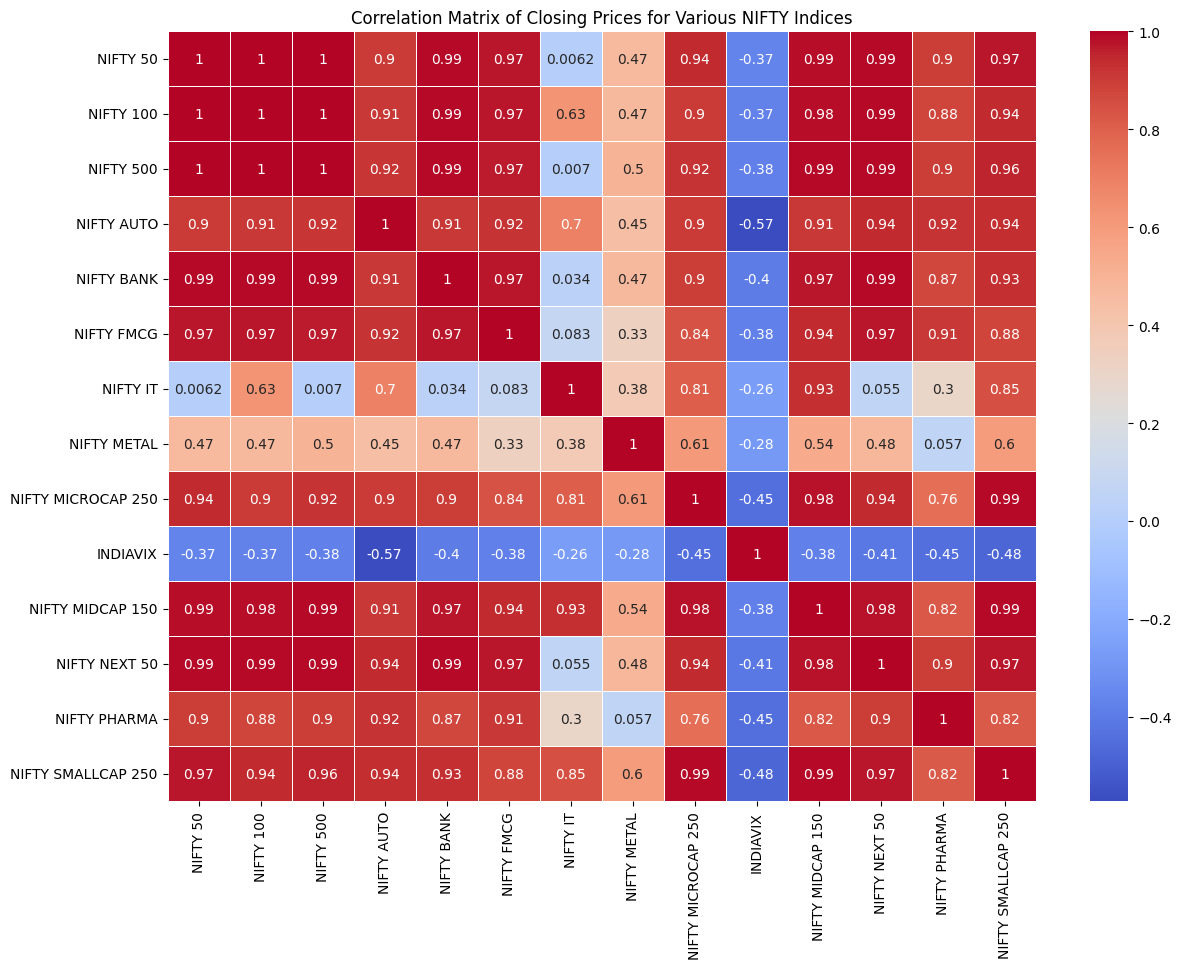

In [4]:
closing_prices = pd.DataFrame({
    name: df.set_index('Date')['Close'] for name, df in dataframes.items() if 'Close' in df.columns
})

correlation_matrix = closing_prices.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices for Various NIFTY Indices')
plt.show()


Strongly correlated indices

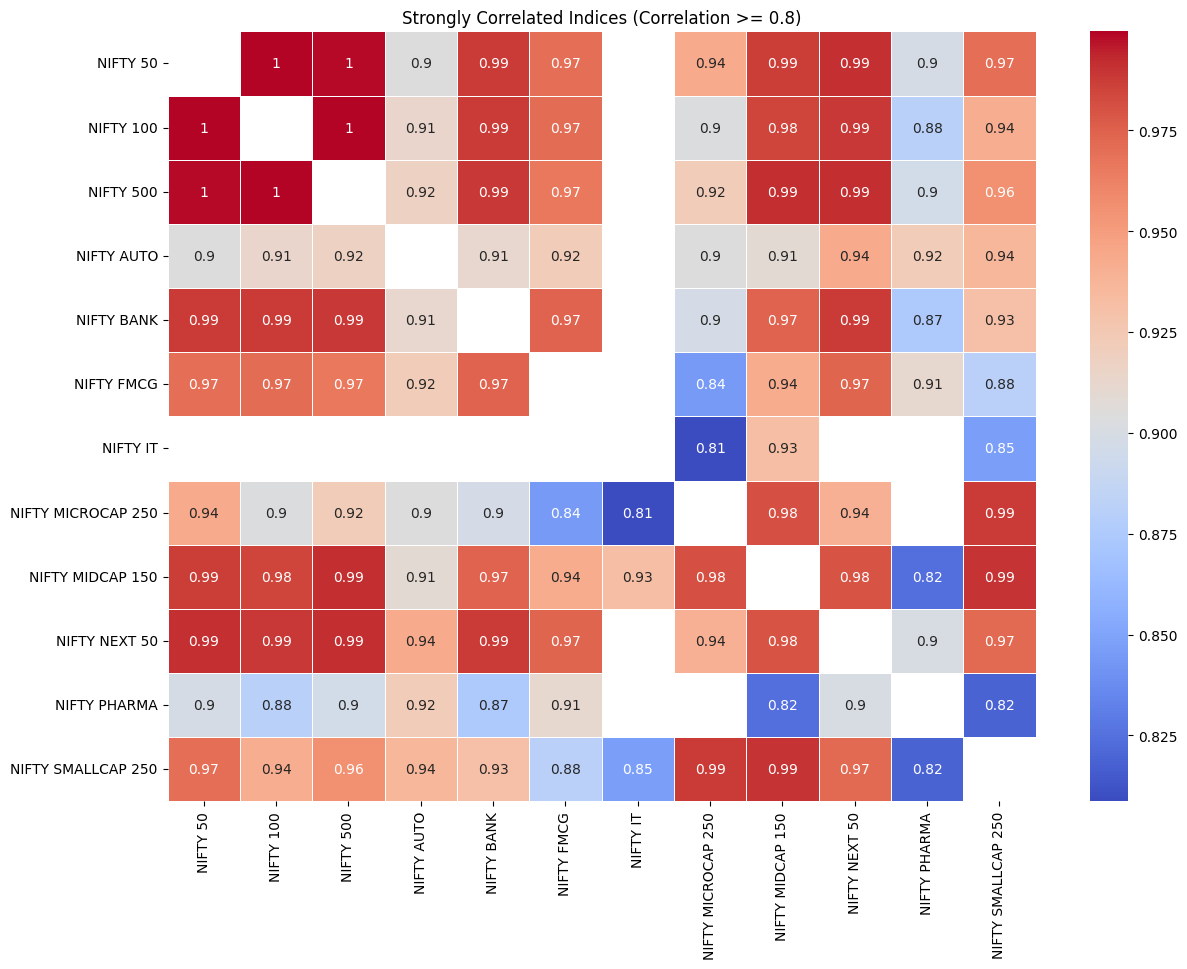

In [5]:
threshold = 0.8
strongly_correlated = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix != 1.0)]
strongly_correlated.dropna(axis=0, how='all', inplace=True)
strongly_correlated.dropna(axis=1, how='all', inplace=True)

plt.figure(figsize=(14, 10))
sns.heatmap(strongly_correlated, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Strongly Correlated Indices (Correlation >= 0.8)')
plt.show()

Implications of correlation on portfolio diversification

In [6]:
# Implications of correlation on portfolio diversification
implications_text = '''
High correlation between indices indicates that they tend to move together. 
For portfolio diversification, it is beneficial to include assets that are less correlated to reduce risk.
Strongly correlated indices may not provide significant diversification benefits.
'''
print(implications_text)


High correlation between indices indicates that they tend to move together. 
For portfolio diversification, it is beneficial to include assets that are less correlated to reduce risk.
Strongly correlated indices may not provide significant diversification benefits.

